In [20]:
#Import Libraries
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [21]:
#read csv file and see top 10 rows
#storedate = name of the dataset
storedata = pd.read_csv('AppleStore.csv')
storedata.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [22]:
# id: App ID

# track_name: App Name

# size_bytes: Size (in Bytes)

# currency: Currency Type

# price: Price amount

# rating_count_tot: User Rating counts (for all version)

# rating_count_ver: User Rating counts (for current version)

# user_rating: Average User Rating value (for all version)

# user_rating_ver: Average User Rating value (for current version)

# ver: Latest version code

# cont_rating: Content Rating

# prime_genre: Primary Genre

# sup_devices.num: Number of supporting devices

# ipadSc_urls.num: Number of screenshots showed for display

# lang.num: Number of supported languages

# vpp_lic: Vpp Device Based Licensing Enabled

In [23]:
#shape
storedata.shape

(7197, 17)

In [24]:
#describe
storedata.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


Text(0.5, 1.0, 'Price vs. User Rating Value')

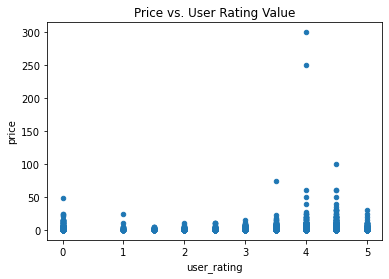

In [25]:
#scatterplot
storedata.plot.scatter(x = 'user_rating', y = 'price')
plt.title("Price vs. User Rating Value")

Text(0.5, 1.0, 'Price vs. User Rating Counts')

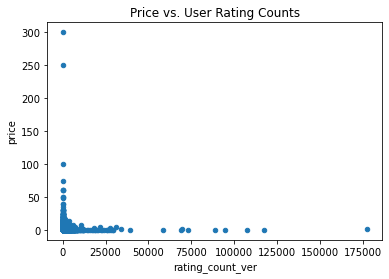

In [26]:
#scatterplot
storedata.plot.scatter(x = 'rating_count_ver', y = 'price')
plt.title("Price vs. User Rating Counts")

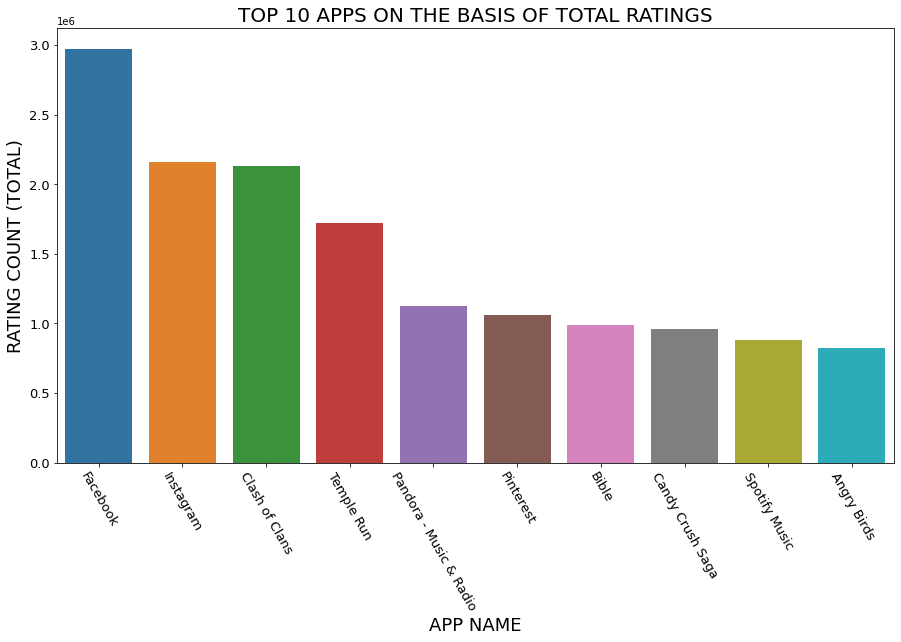

In [27]:
#visualize bar graphs
def visualizer(x, y, plot_type, title, xlabel, ylabel, rotation=False, rotation_value=60, figsize=(15,8)):
    plt.figure(figsize=figsize)
    
    if plot_type == "bar":  
        sns.barplot(x=x, y=y)
    elif plot_type == "count":  
        sns.countplot(x)
    elif plot_type == "reg":  
        sns.regplot(x=x,y=y)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.yticks(fontsize=13)
    if rotation == True:
        plt.xticks(fontsize=13,rotation=rotation_value)
    plt.show()

store_data_sorted = storedata.sort_values('rating_count_tot', ascending=False)
subset_store_data_sorted = store_data_sorted[:10]

visualizer(subset_store_data_sorted.track_name, subset_store_data_sorted.rating_count_tot, "bar", "TOP 10 APPS ON THE BASIS OF TOTAL RATINGS",
          "APP NAME", "RATING COUNT (TOTAL)", True, -60)

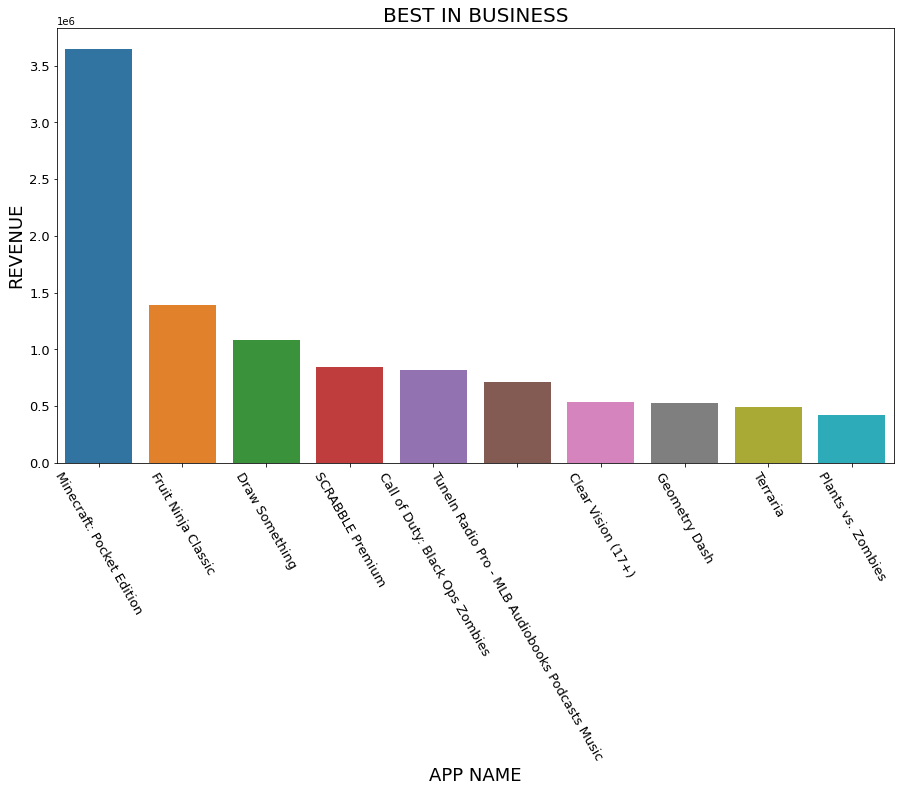

In [28]:
storedata['revenue'] = storedata.rating_count_tot * storedata.price
storedata_business = storedata.sort_values("revenue", ascending=False)
subset_storedata_business = storedata_business[:10]

visualizer(subset_storedata_business.track_name, subset_storedata_business['revenue'], "bar", "BEST IN BUSINESS",
         "APP NAME", "REVENUE", True, -60)

In [29]:
#prevent warning
pd.options.mode.chained_assignment = None

In [30]:
#Data Cleaning

In [31]:
#finding null values
storedata[storedata.isnull().any(axis=1)] 

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,revenue


In [32]:
#remove unnecessary columns
storedata.drop('Unnamed: 0', axis = 1, inplace = True) # not useful
storedata.drop('track_name', axis = 1, inplace = True) # not useful
storedata.drop('id', axis = 1, inplace = True) # not useful

In [33]:
#notice that currency has one value so we have to check it
storedata['currency'].unique()

array(['USD'], dtype=object)

In [34]:
#then remove this attribute since it does not add any value
storedata.drop('currency', axis = 1, inplace = True)

In [35]:
#info to that the data is clean
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   size_bytes        7197 non-null   int64  
 1   price             7197 non-null   float64
 2   rating_count_tot  7197 non-null   int64  
 3   rating_count_ver  7197 non-null   int64  
 4   user_rating       7197 non-null   float64
 5   user_rating_ver   7197 non-null   float64
 6   ver               7197 non-null   object 
 7   cont_rating       7197 non-null   object 
 8   prime_genre       7197 non-null   object 
 9   sup_devices.num   7197 non-null   int64  
 10  ipadSc_urls.num   7197 non-null   int64  
 11  lang.num          7197 non-null   int64  
 12  vpp_lic           7197 non-null   int64  
 13  revenue           7197 non-null   float64
dtypes: float64(4), int64(7), object(3)
memory usage: 787.3+ KB


In [36]:
#data types
storedata.dtypes

size_bytes            int64
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
revenue             float64
dtype: object

In [37]:
#remove + (symbol) from cont_rating
storedata['cont_rating'] = storedata['cont_rating'].astype('object').str.replace('+', '')
storedata['cont_rating'] = pd.to_numeric(storedata['cont_rating'])

<ipython-input-37-78930a71174b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  storedata['cont_rating'] = storedata['cont_rating'].astype('object').str.replace('+', '')


In [38]:
storedata["cont_rating"] = storedata["cont_rating"].astype('category')
storedata["prime_genre"] = storedata["prime_genre"].astype('category')

#Label Encoding
storedata["cont_rating"] = storedata["cont_rating"].cat.codes
storedata["prime_genre"] = storedata["prime_genre"].cat.codes

In [39]:
#no duplicated records
storedata[storedata.duplicated(keep='last')]

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,revenue


In [40]:
#user rating not 0
storedata = storedata[storedata["user_rating"] != 0]

In [41]:
#Linear Regression

In [42]:
#top 10 head of head for linear regression usage
data = storedata[[ "size_bytes", "price", "rating_count_tot","user_rating","cont_rating","prime_genre"]]
data.head(10)

,size_bytes,price,rating_count_tot,user_rating,cont_rating,prime_genre
0,100788224,3.99,21292,4.0,0,7
1,158578688,0.00,161065,4.0,0,15
2,100524032,0.00,188583,3.5,0,22
3,128512000,0.00,262241,4.0,2,17
4,92774400,0.00,985920,4.5,0,16
5,10485713,0.99,8253,4.0,0,7
6,227795968,0.00,119487,4.0,0,5
7,130242560,0.00,1126879,4.0,2,11
8,49250304,9.99,1117,4.5,0,21
9,70023168,3.99,7885,4.0,0,7


In [43]:
result = smf.ols(formula='price ~ user_rating + size_bytes + cont_rating + rating_count_ver + rating_count_tot', data=storedata).fit()    
print(result.summary())  
plt.show(result)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     41.07
Date:                Tue, 14 Sep 2021   Prob (F-statistic):           1.02e-41
Time:                        17:10:36   Log-Likelihood:                -20156.
No. Observations:                6268   AIC:                         4.032e+04
Df Residuals:                    6262   BIC:                         4.036e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0270      0.435  

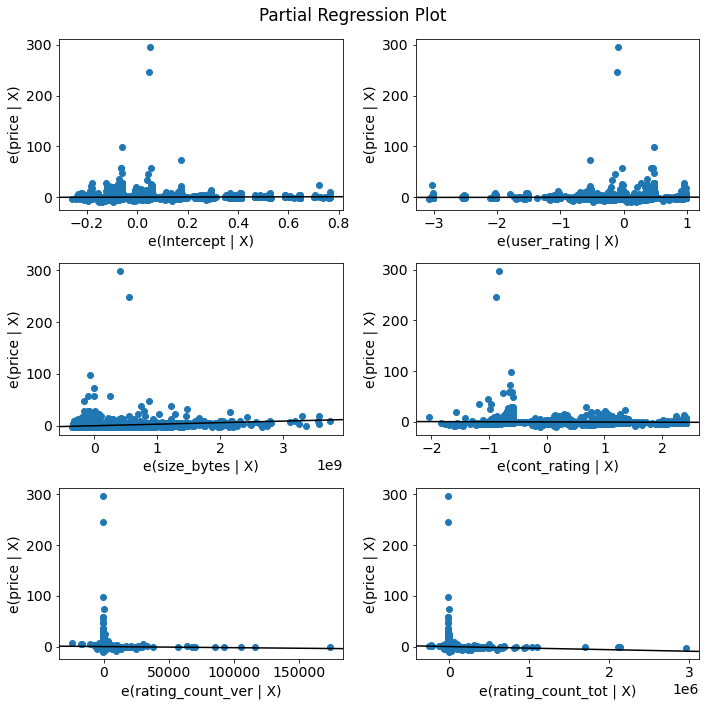

In [44]:
plt.rc("figure", figsize=(10,10))
plt.rc("font", size=14)
fig = sm.graphics.plot_partregress_grid(result)
fig.tight_layout(pad=1.0)

In [45]:
#Correlation of Features
corr_store_data = storedata.corr()
corr_store_data["rating_count_tot"].sort_values(ascending=False)

rating_count_tot    1.000000
rating_count_ver    0.161193
revenue             0.154201
lang.num            0.132595
user_rating_ver     0.060232
user_rating         0.055342
prime_genre         0.039352
cont_rating         0.019707
sup_devices.num     0.013863
ipadSc_urls.num     0.001638
size_bytes          0.001481
vpp_lic            -0.006465
price              -0.042765
Name: rating_count_tot, dtype: float64

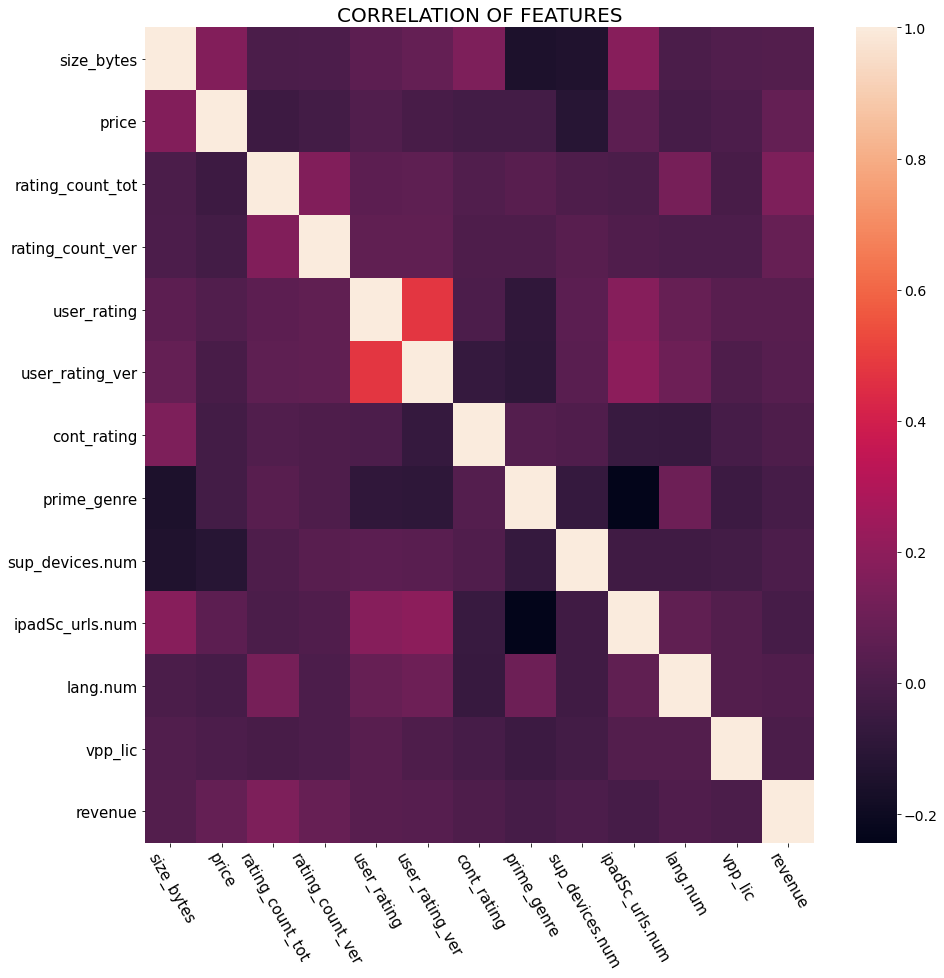

In [46]:
#Heatmap
plt.figure(figsize=(15,15))
plt.title("CORRELATION OF FEATURES", fontsize=20)
sns.heatmap(corr_store_data)
plt.xticks(rotation=(-60), fontsize=15)
plt.yticks(fontsize=15)
plt.show()